In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
year = "2025"
month = "05"
day = "05"
min_time_str = "123005"
max_time_str = "123205"

use_freq_bands = [
    "41",
    "46",
    "50",
    "55",
    "59",
    "64",
    "69",
    "73",
    "78",
    "82",
]
all_time_stamps = []

for use_freq in use_freq_bands:
    datadir = f"/lustre/pipeline/slow/{use_freq}MHz/{year}-{month}-{day}/12"
    all_files = os.listdir(datadir)
    time_stamps = np.array([int(filename.split("_")[1]) for filename in all_files])
    all_time_stamps.append(time_stamps)

In [4]:
all_time_stamps_flattened = np.array([x for array in all_time_stamps for x in array])

In [5]:
np.min(all_time_stamps_flattened)
np.max(all_time_stamps_flattened)

125959

In [ ]:
n_time_steps = int(np.ceil((np.max(all_time_stamps_flattened)-np.min(all_time_stamps_flattened))/10))
target_times = np.array([np.min(all_time_stamps_flattened) + time_step * 10 for time_step in range(n_time_steps)])
n_channels_present = np.zeros(n_time_steps)
for time_step in range(n_time_steps):
    for freq_ind in range(len(use_freq_bands)):
        if np.min(np.abs(np.array(all_time_stamps[freq_ind])-target_times[time_step])) < 10:  # Should use datetime objects
            n_channels_present[time_step] += 1

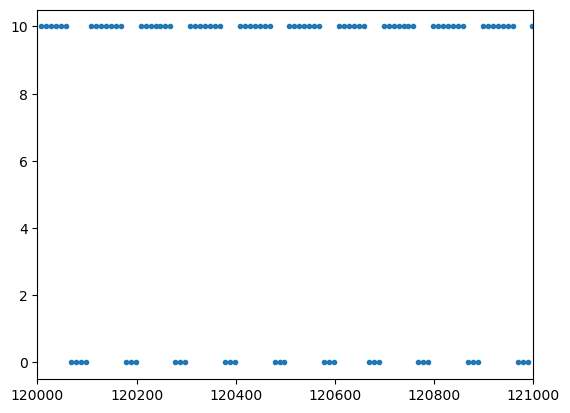

In [24]:
plt.plot(target_times, n_channels_present, ".")
plt.xlim((120000, 121000))
plt.show()